# Convolutional Neural N/w
Convolutional Neural Networks (CNN) are an alternative type of DNN that allow to model both time and space correlations in multivariate signals.

In deep learning, a Convolutional Neural Network (CNN/ConvNet) is a class of deep neural networks, most commonly applied to analyze visual imagery using Filters.

It uses a special technique called Convolution along with Pooling.

In CNNs, filters are not defined. The value of each filter is learned during the training process. ... This also allows CNNs to perform hierarchical feature learning; which is how our brains are thought to identify objects. 

In the image, we can see how the different filters in each CNN layer interprets the number 0, ie; on a blank board we follow black patterns to recognize what is the image.

# The layers in a Convolutional model may look as follows:

1. Input Image
2. Convolutional Layer
3. Nonlinearity
4. Pooling Layer

In [1]:
# Import necessary modules

import tensorflow as tf
import keras

In [2]:
# Load dataset

mnist = tf.keras.datasets.fashion_mnist

In [3]:
# Split data into training and test dataset

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# Normalize the training and test data
# mnist dataset consists of 70,000 images in total so we can divide 60,000 images for training and remaining 10,000 for testing

training_images=training_images.reshape(60000, 28, 28, 1)  # CNN takes i/p in 3*3 (28, 28, 1) format
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

#### Convolutions: 
1. CNN processes the images down into Raw Features and then they find the sets of features which matches the Label.
2. They do this usning Filters.
3. Neuron learns weights and biases in the dataset to make prediction whereas Convolutions/CNN learns filters through an initial Randomization, then using the loss function and optimizer to tweak them for better results.
4. ie; Convolutions extracts the filters that can determine the Class.

#### Pooling:
1. Extracting the feature while removing extraneous(irrelevant or unrelated to the subject being dealt with) information which makes the learning much faster.
2. Pooling is required to down sample the detection of features in feature maps.
3. Here in our CNN model we are using Max pooling which considers the max value from the subset but we also have Min-pooling, Avg-pooling,...etc.

In [5]:
# Here we are building our Neural n/w consisting of 2 2D-Convolutional layes along with flat and deep neurals

model = tf.keras.models.Sequential([# Convolution1
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Convolution2
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Flattening the o/p
                                    tf.keras.layers.Flatten(),
                                    # 128 dense layers, and 10 output layers
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
                                    ])

In [6]:
# Lets compile our model by optimizing loss and maximizing Accuracy (more epochs->more accurate)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.6166 - accuracy: 0.77770s - loss: 0.6185 - 
Epoch 2/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3084 - accuracy: 0.8844
Epoch 3/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2601 - accuracy: 0.9054
Epoch 4/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2171 - accuracy: 0.91950s -
Epoch 5/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1876 - accuracy: 0.92890s - loss: 0.1876 - accuracy: 0.92


In [7]:
# Also Evaluate the performance of test data based on the model created

test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 10ms/step - loss: 0.2465 - accuracy: 0.9100


In [8]:
# Evaluation results: -

# Training data -> accuracy: 0.9263 = 92.63% accurate
# Test data -> accuracy: 0.9071 = 90.71% accurate

In [9]:
# Summarize the CNN model we built and check how i/p data is transforming stage by stage to predict the class using filters

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [10]:
# Observation from Model.summary

# Though our i/p was (28, 28, 1) our o/p shape in model.summary is (26, 26, 1) 
# because first and last pixels are ignored or considered as it is.
# Reason: they do not have neighbors on all the four side
# Then Pooling halves down the o/p to acheive better Class

In [11]:
# This print shows us the first 100 labels in the test set

print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [12]:
# Observation: 

# The ones at index 0, index 23 and index 28 are all the same value (9), They're all shoes.

# Visualizing the Convolutions and Pooling

The model is trying to find the commonality between shoes based on this convolution/pooling combination.

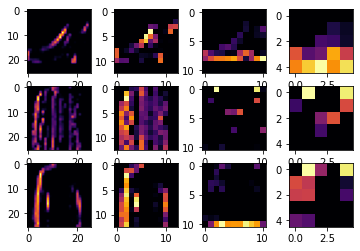

In [15]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# Predictions

In [17]:
import numpy as np

predictions = model.predict(test_images)
print(np.argmax(np.round(predictions[0])))

9


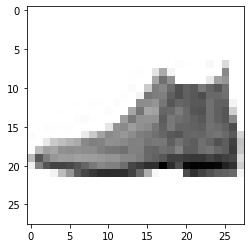

In [18]:
import matplotlib.pyplot as plt

plt.imshow(test_images[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [19]:
print(np.argmax(np.round(predictions[4])))

0


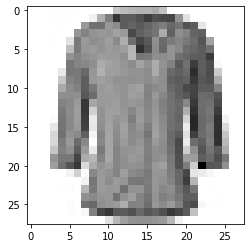

In [20]:
plt.imshow(test_images[4].reshape(28, 28), cmap = plt.cm.binary)
plt.show()